In [1]:
import pandas as pd

In [2]:
train_dataset = pd.read_csv('train_data.txt', sep = ':::', names = ['Title', 'Genre', 'Description'], engine = 'python')
test_dataset = pd.read_csv('test_data.txt', sep = ':::', names = ['Id', 'Title', 'Description'], engine = 'python')

In [3]:
train_dataset.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_dataset.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
train_dataset.shape

(54214, 3)

In [6]:
test_dataset.shape

(54200, 3)

In [7]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
train_dataset.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [9]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
train_dataset.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [11]:
print(train_dataset.duplicated().sum())
print(test_dataset.duplicated().sum())

0
0


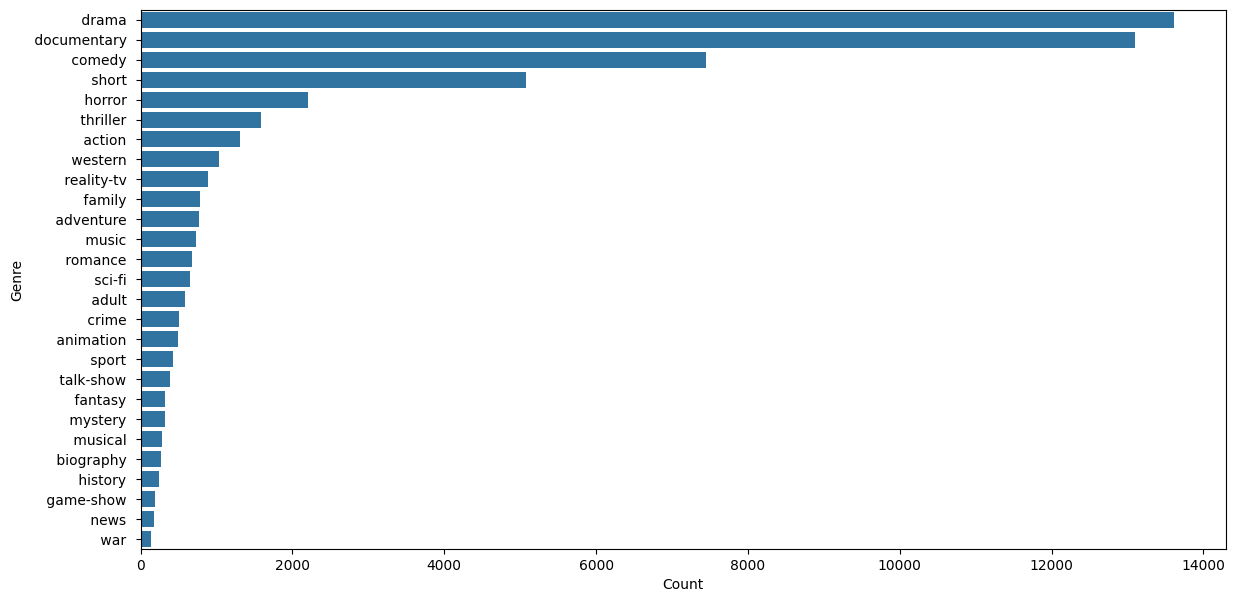

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14, 7))
sns.countplot(data = train_dataset, y = 'Genre', hue = None, order = train_dataset['Genre'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

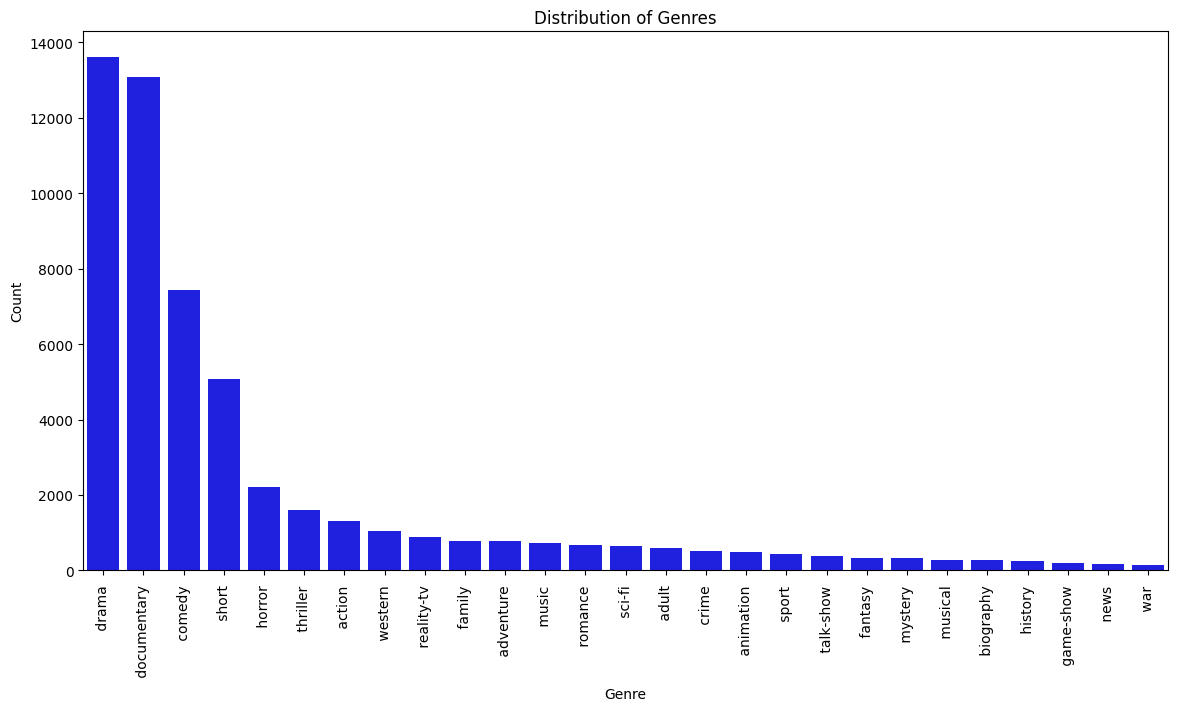

In [13]:
plt.figure(figsize = (14,7))
counts = train_dataset.Genre.value_counts()
sns.barplot(x = counts.index, y = counts, color = 'blue')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


In [14]:
train_dataset['Desc_len'] = train_dataset['Description'].apply(len)
train_dataset.head()

,Title,Genre,Description,Desc_len
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


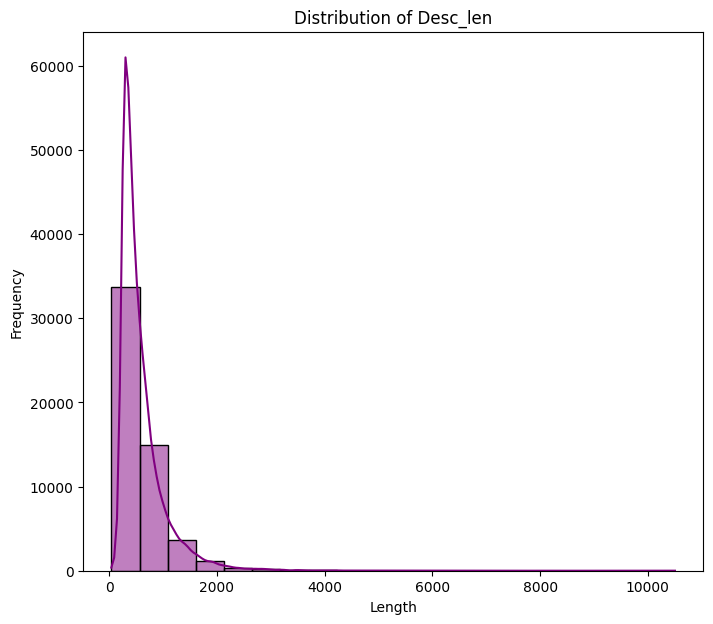

In [15]:
plt.figure(figsize = (8,7))
sns.histplot(data = train_dataset, x = 'Desc_len', bins = 20, kde = True, color = 'purple')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Desc_len')
plt.show()

In [16]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
import string
import nltk

In [17]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub('-', ' ', text.lower())
    text = re.sub(f'[{string.digits}]', ' ', text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text, language = 'english', preserve_line = True)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text = re.sub("\s[\s]+", ' ', text).strip()
    return re.sub(f'[{re.escape(string.punctuation)}]', '', text)

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\debas\AppData\Local\Temp\ipykernel_1400\1273940605.py:15: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s[\s]+", ' ', text).strip()


In [19]:
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certainli get dramat boost hello bye iem yee


In [22]:
train_dataset['Clean_text'] = train_dataset['Description'].apply(clean_text)

In [23]:
test_dataset['Clean_text'] = test_dataset['Description'].apply(clean_text)

In [24]:
train_dataset['len_clean_text'] = train_dataset['Clean_text'].apply(len)
train_dataset.head()

,Title,Genre,Description,Desc_len,Text_cleaning,Clean_text,len_clean_text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listen convers doctor parents year old oscar l...,listen convers doctor parents year old oscar l...,349
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestu relationship curre...,brother sister past incestu relationship curre...,111
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,empti student field trip museum natur history ...,empti student field trip museum natur history ...,348
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy father make end meet edith twin ...,help unemploy father make end meet edith twin ...,685
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film titl refer recov bodi ground zero also st...,film titl refer recov bodi ground zero also st...,348


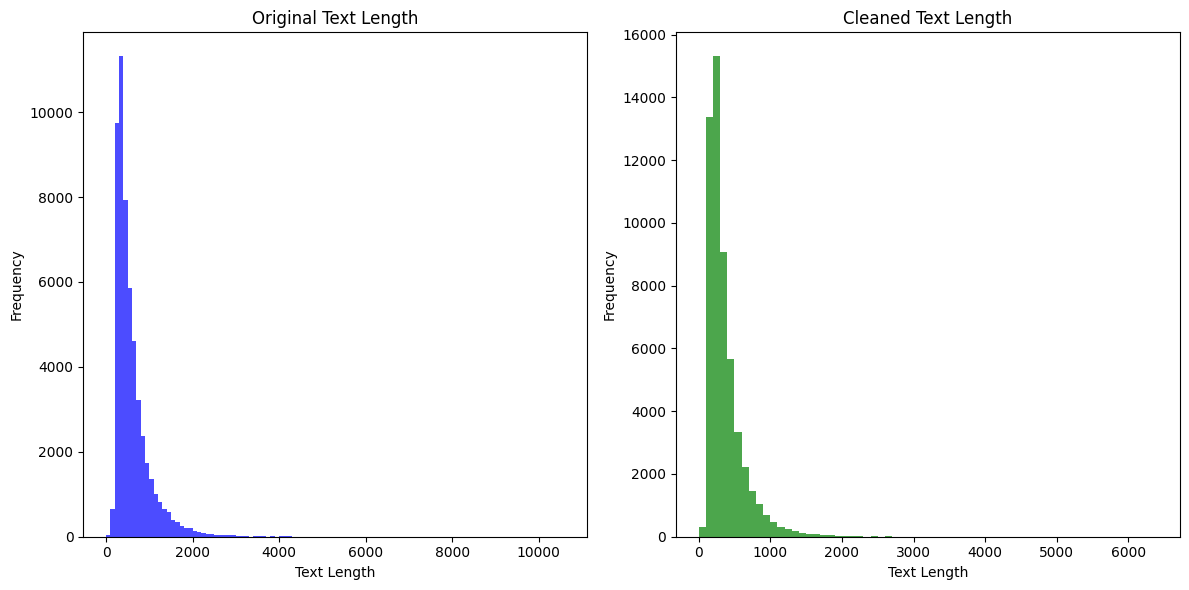

In [25]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
original_length = train_dataset['Description'].apply(len)
plt.hist(original_length, bins = range(0, max(original_length) + 100, 100), color = 'blue', alpha = 0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
cleaned_length = train_dataset['Clean_text'].apply(len)
plt.hist(cleaned_length, bins = range(0, max(cleaned_length) + 100, 100), color = 'green', alpha = 0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

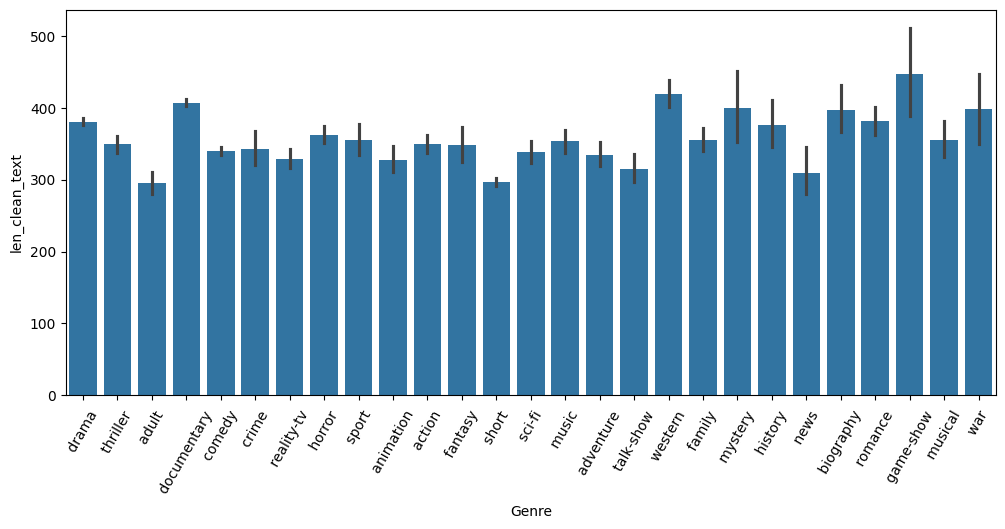

In [26]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'Genre' ,y = 'len_clean_text' ,data = train_dataset) 
plt.xticks(rotation = 60)
plt.show()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(train_dataset['Description']).toarray()
y = train_dataset['Genre'].values

In [60]:
X

array([[0.        , 0.12747375, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.19794627, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [61]:
y

array([' drama ', ' thriller ', ' adult ', ..., ' documentary ',
       ' comedy ', ' history '], dtype=object)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from  sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [67]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb,average='micro'))

0.16333118140735958
[[ 56  12  11  14   5   2  25   1   8   8  15   0   2   6   2   6  14   0
    6   8  33   2   4   3  15   0  10]
 [  2  36  10   5   1  10   4   1   2   1   5   0   1   8   6   3   5   1
    5   7   3   3   2   0  12   0   3]
 [  8  16  19   8   3   3   7   6   4   8   8   0   3   6   1   2   6   0
    5   5   8   4   3   2   6   0   7]
 [  3   4   6  22   0   1   1   3   1   6  13   0   3   3   6   2   3   0
    0   1   7   2   1   0   0   0   2]
 [  3   1   2   1   2   3   2   6   4   3   1   0   3   3   3   1   0   0
    5   0   1   2   2   2   0   1   0]
 [ 73 109  70  93  27 114 121  19  35  90  40   3  10  48  39  51  55   3
  100 132  37  23  25  34  87   2  39]
 [  3   6   9   1   1   3  23   3   4   1   5   0   1   4   1   0  10   1
    1   7  10   2   2   0  10   1   7]
 [104  17 114  73 121  28  82 781  44 150  25   4  78  37 164  18  24  10
  262  52 105 100  69  66  67   9  11]
 [150 107 134  89  61  71 220  67 191 163  92   5  43 106  30  63 102   4
  

In [74]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb,average='micro'))

0.4972793507331919
[[  14    0    0    0    0   22    0   55  171    0    0    0    0    2
     0    0    0    0    0    0    0    2    1    0    1    0    0]
 [   0    4    2    0    0   42    0   11   73    0    0    0    0    0
     0    0    0    0    0    0    0    4    0    0    0    0    0]
 [   1    1    3    0    0   19    0   42   78    0    0    0    0    1
     0    0    0    0    0    0    0    2    0    0    0    0    1]
 [   0    0    0    0    0   15    0   35   39    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    3    0   35   11    0    0    0    0    1
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0  558    0  154  752    0    0    0    0    3
     0    0    0    0    0    0    0   12    0    0    0    0    0]
 [   2    0    0    0    0   15    0   15   79    0    0    0    0    2
     0    0    0    0    0    0    0    0    0    0    2    0    1]
 

In [75]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb,average='micro'))

0.4823388361154662
[[ 106    3    8    1    0   24    3   13   17    1    3    1    1    7
     0    0    3    0    1    8   18   22    8    1   13    1    5]
 [   2   68    5    0    0   23    0    0    8    1    0    0    0    2
     1    0    0    0    2    2    0   19    0    0    2    0    1]
 [   7   17   22    3    1   15    1    9   13    0    5    0    1    4
     1    0    1    0   11    0    6   18    1    1    4    1    6]
 [   4    0    6   18    0    8    0    6    8    6    2    0    1    4
     2    0    0    0    1    2    6   16    0    0    0    0    0]
 [   0    0    1    0    1    2    1   23    6    0    0    0    0    1
     2    1    0    0    0    0    0    7    3    2    0    1    0]
 [  33   14    9    5    2  723    6   29  204    7    3    0    2   23
    22    4    6    1   34   90    3  179    9   39   14    4   14]
 [  21    1    2    0    0   21   15    4   13    0    0    0    0    5
     0    0    4    0    2    3    0    5    1    0   17    0    2]
 

In [76]:
lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred_lrc))
print(confusion_matrix(y_test,y_pred_lrc))
print(precision_score(y_test,y_pred_lrc,average='micro'))

0.5689384856589504
[[  60    1    1    0    0   37    2   33   97    1    0    0    0    6
     0    0    0    0    1    0    3    9    2    0   12    1    2]
 [   1   36    2    0    0   38    0    8   37    0    0    0    0    2
     0    0    0    0    0    0    0   11    0    0    0    0    1]
 [   1    8   18    0    0   25    1   25   48    1    0    0    0    3
     0    0    0    0    1    1    3    9    0    0    2    0    2]
 [   8    0    1   11    0   23    0   13   14    5    2    0    0    5
     0    0    0    0    0    0    3    4    1    0    0    0    0]
 [   0    0    0    0    0    4    0   33   11    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    2    0    0]
 [  11    5    0    1    0  811    2   77  477    1    0    0    0   15
     3    2    0    0    8    1    2   46    3    6    4    0    4]
 [   7    0    0    0    0   19    2   14   57    0    0    0    0    5
     0    0    0    0    0    0    0    1    0    0    9    0    2]
 